# Loghist : logarithmic histograms

I created Utilities to draw lognormal distribution histograms and time delta - related histograms


In [1]:
import sys
sys.path.insert(0, '../modules')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sns.set()
import loghist

## Generate a sample distribution
### trimodal distribution composed of three lognormal humps

In [2]:
df1 = pd.DataFrame({'data': np.random.lognormal(mean=3.0, 
                                                sigma=1.3, 
                                                size = 10000), 
                    'category': 1})
df2 = pd.DataFrame({'data': np.random.lognormal(mean=8.0, 
                                                sigma=1.2, 
                                                size = 10000), 
                    'category': 2})
df3 = pd.DataFrame({'data': np.random.lognormal(mean=13.0, 
                                                sigma=1, 
                                                size = 10000), 
                    'category': 3})
df = pd.concat([df1, df2, df3])

In [3]:
df.describe()

,data,category
count,3.000000e+04,30000.00000
mean,2.419756e+05,2.00000
std,6.209984e+05,0.81651
min,1.117846e-01,1.00000
25%,4.687426e+01,1.00000
50%,2.972750e+03,2.00000
75%,2.272870e+05,3.00000
max,1.560642e+07,3.00000


## Show this distribution on linear scale

Due to the nature of lognormal, the three humps are not visible.

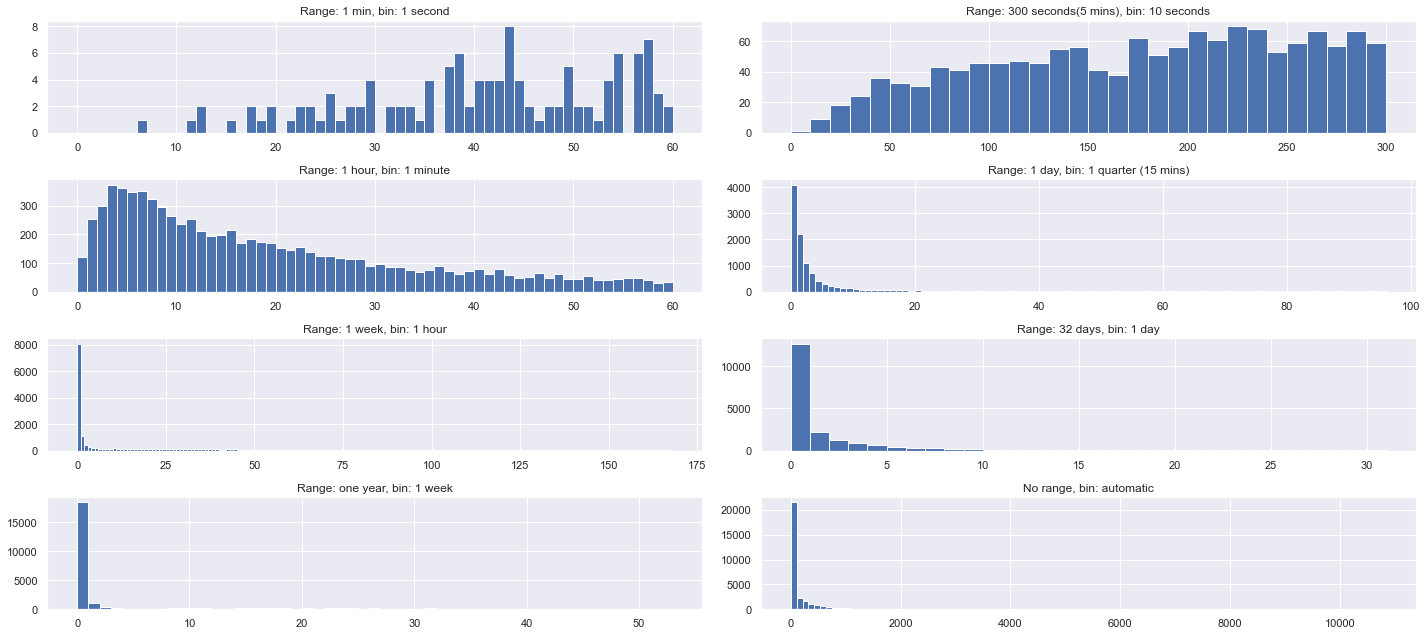

In [4]:
# this method assumes the data represents minutes

loghist.hist8t(df, 'data', unit = 'minute')

In [5]:
# verify that the same data, transformed to seconds, will yield the same visual representation

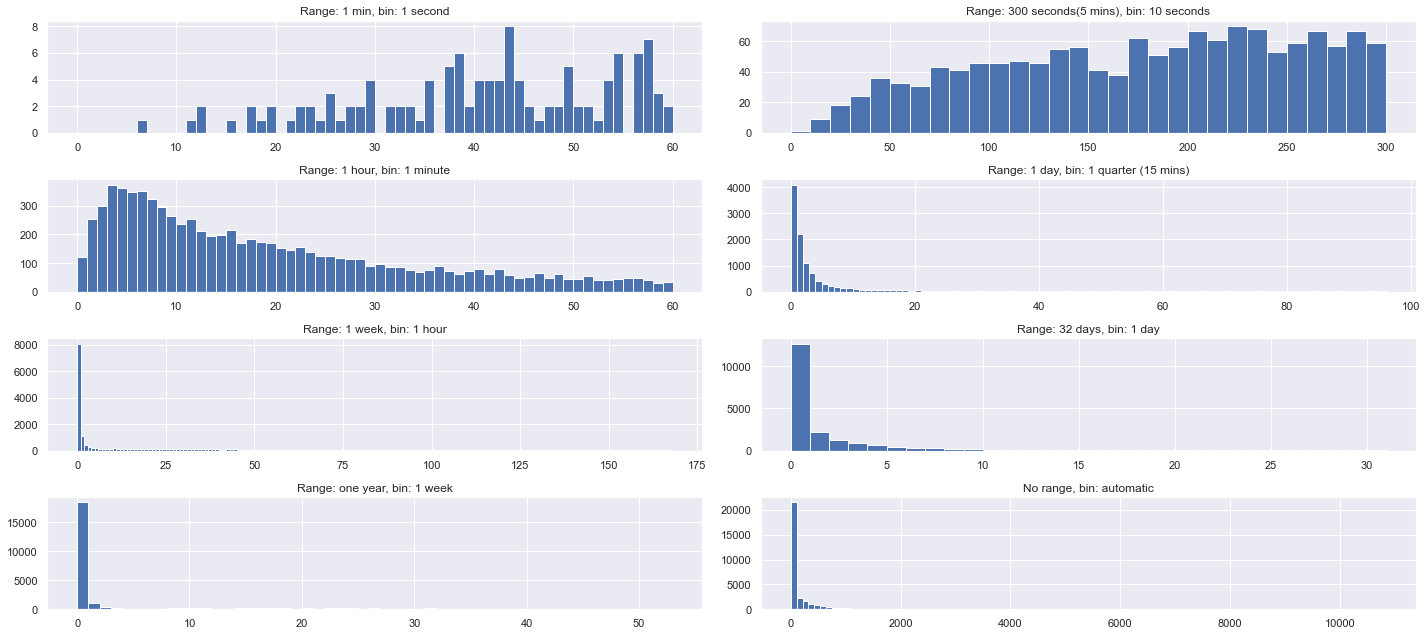

In [6]:
df['data_s'] = df['data'] * 60
loghist.hist8t(df, 'data_s', unit = 'second')

# Visualise this distribution on logarithmic scale

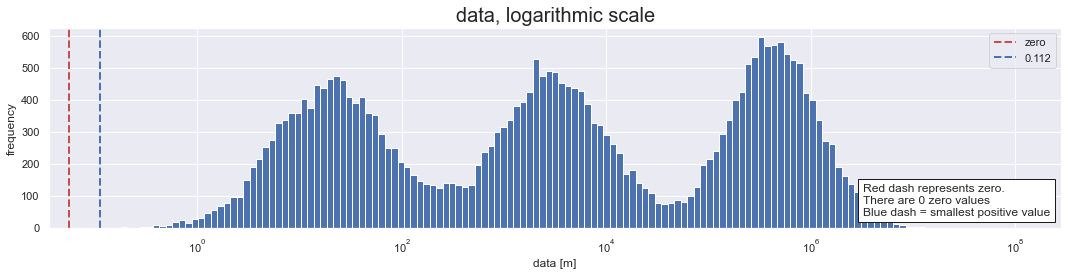

In [7]:
from loghist import lhist

fig, ax = plt.subplots(1,1, figsize = (15,4))
sns.set(font_scale=1)

lhist(axis = ax, df = df, field = 'data')

ax.set_title('data, logarithmic scale', fontsize = 20)
ax.set_xlabel('data [m]')
ax.set_ylabel('frequency')

plt.tight_layout()

plt.show()

# visualise the distribution stacked

Again, the lognormal scale reveals the true nature of things. The linear scale does not.

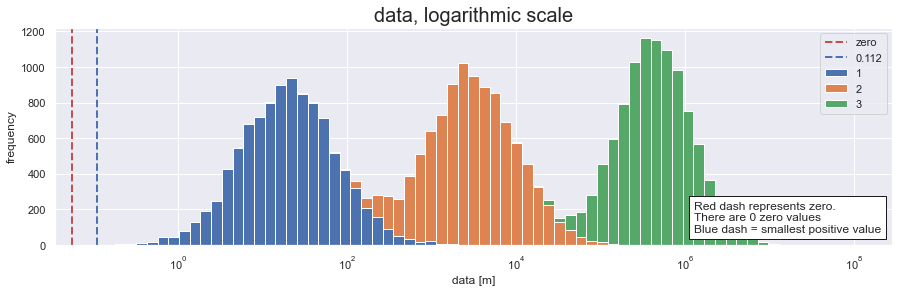

In [8]:
fig, ax = plt.subplots(1,1, figsize = (15,4))
sns.set(font_scale=1)

lhist(axis = ax, df = df, field = 'data', group_field = 'category', bin_density = 8)

ax.set_title('data, logarithmic scale', fontsize = 20)
ax.set_xlabel('data [m]')
ax.set_ylabel('frequency')

plt.show()

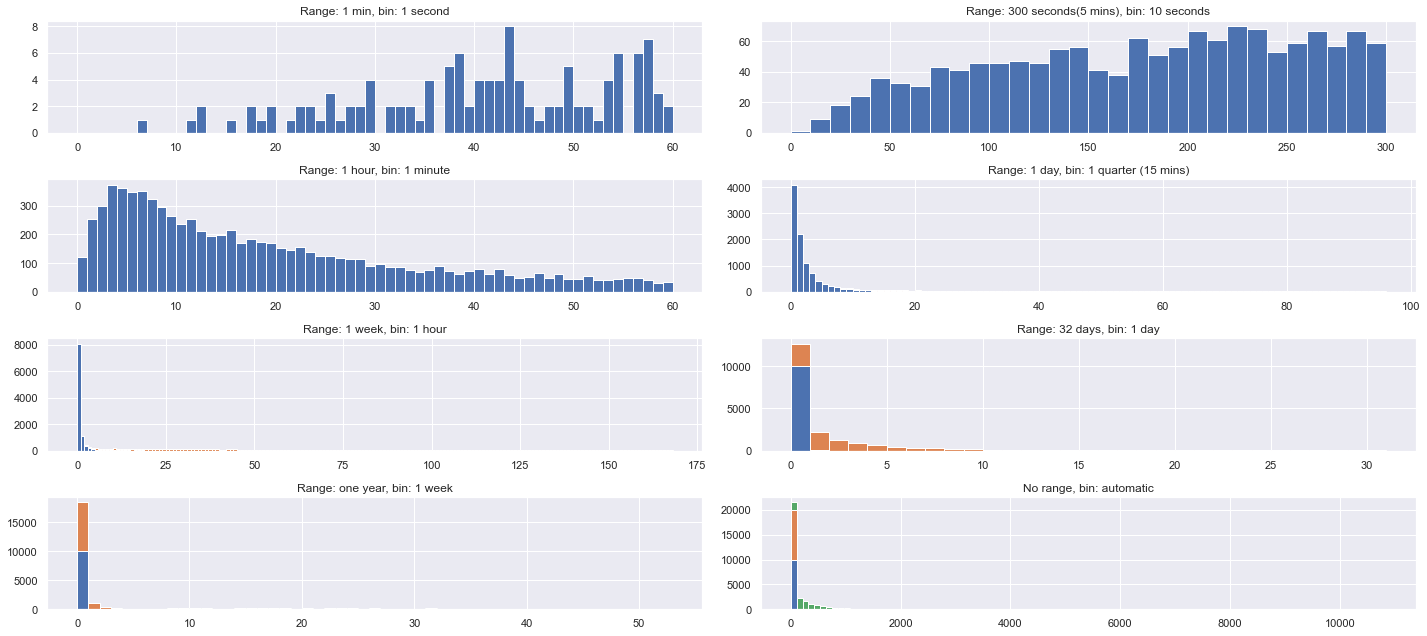

In [9]:
loghist.hist8t_stacked(df, 'data', group_field = 'category', unit = 'minute')